
# 10.1 日付、時間のデータ型とツール

In [1]:
from datetime import datetime
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
now = datetime.now()
now

datetime.datetime(2017, 6, 17, 9, 55, 15, 247890)

In [3]:
now.year, now.month, now.day, now.hour, now.minute, now.second, now.microsecond

(2017, 6, 17, 9, 55, 15, 247890)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15) 

In [5]:
delta

datetime.timedelta(926, 56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)

In [8]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(0,20)

datetime.datetime(2011, 1, 6, 23, 59, 20)

# 10.1.1 文字列とdatetimeの変換

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [12]:
value = '2011-01-03'

In [13]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']

In [15]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [16]:
from dateutil.parser import parse

In [17]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
parse('6/21/2011', dayfirst=True)

datetime.datetime(2011, 6, 21, 0, 0)

In [20]:
datestrs

['7/6/2011', '8/6/2011']

In [21]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [22]:
idx = pd.to_datetime(datestrs + [None])

In [23]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
idx[2]

NaT

In [25]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

# 10.2

In [26]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [27]:
ts = Series(np.random.randn(6), index=dates)

In [28]:
ts

2011-01-02   -0.326344
2011-01-05   -0.039878
2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
2011-01-12    1.266163
dtype: float64

In [29]:
type(ts)

pandas.core.series.Series

In [30]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [31]:
ts + ts[::2]

2011-01-02   -0.652688
2011-01-05         NaN
2011-01-07   -2.458586
2011-01-08         NaN
2011-01-10   -2.121377
2011-01-12         NaN
dtype: float64

In [32]:
ts.index.dtype

dtype('<M8[ns]')

In [33]:
stamp = ts.index[0]

In [34]:
stamp

Timestamp('2011-01-02 00:00:00')

# 10.2.1

In [35]:
stamp = ts.index[2]

In [36]:
ts[stamp]

-1.2292931301796783

In [37]:
ts['1/10/2011']

-1.0606884833202688

In [38]:
ts['20110110']


-1.0606884833202688

In [39]:
longer_ts = Series(np.random.randn(1000),
                  index=pd.date_range('1/1/2000', periods=1000))

In [40]:
longer_ts

2000-01-01    0.319274
2000-01-02    1.271568
2000-01-03    1.515410
2000-01-04   -0.029101
2000-01-05    0.248455
2000-01-06    0.654618
2000-01-07    0.332618
2000-01-08    0.865041
2000-01-09   -0.296521
2000-01-10    1.361987
2000-01-11    0.251707
2000-01-12   -0.523458
2000-01-13    0.812632
2000-01-14    0.265603
2000-01-15   -1.755374
2000-01-16   -0.073892
2000-01-17    0.465285
2000-01-18    0.575828
2000-01-19    0.573745
2000-01-20    0.600275
2000-01-21    0.640648
2000-01-22    1.421208
2000-01-23    1.616996
2000-01-24    1.621195
2000-01-25    0.768443
2000-01-26   -0.945435
2000-01-27    2.059859
2000-01-28   -0.150751
2000-01-29   -1.082928
2000-01-30    0.031592
                ...   
2002-08-28   -1.206972
2002-08-29   -0.084777
2002-08-30    1.413226
2002-08-31   -0.503994
2002-09-01    0.805048
2002-09-02    1.905037
2002-09-03   -0.124078
2002-09-04    0.935154
2002-09-05   -1.110256
2002-09-06   -1.355374
2002-09-07    0.198964
2002-09-08   -1.053712
2002-09-09 

In [41]:
longer_ts['2001']

2001-01-01    0.042778
2001-01-02    0.125729
2001-01-03   -0.641620
2001-01-04    0.946124
2001-01-05   -0.442481
2001-01-06    0.745185
2001-01-07   -0.674272
2001-01-08   -0.217002
2001-01-09    2.117562
2001-01-10    0.878202
2001-01-11   -1.504739
2001-01-12    0.837552
2001-01-13   -1.000222
2001-01-14   -0.610356
2001-01-15   -0.744714
2001-01-16    0.134546
2001-01-17    1.378345
2001-01-18   -0.745527
2001-01-19   -2.606735
2001-01-20    1.405690
2001-01-21    0.377302
2001-01-22    0.464234
2001-01-23   -1.313028
2001-01-24   -0.342679
2001-01-25   -0.349856
2001-01-26   -1.295252
2001-01-27    1.842187
2001-01-28    0.411191
2001-01-29   -0.990785
2001-01-30    0.259442
                ...   
2001-12-02   -2.366510
2001-12-03    1.586815
2001-12-04   -0.260809
2001-12-05    0.111840
2001-12-06    0.166817
2001-12-07    0.087666
2001-12-08    0.770850
2001-12-09   -0.549593
2001-12-10   -0.037666
2001-12-11   -0.509024
2001-12-12    0.666638
2001-12-13   -1.317561
2001-12-14 

In [42]:
longer_ts['2001-05']

2001-05-01    0.085134
2001-05-02   -1.276111
2001-05-03   -0.897728
2001-05-04   -0.591892
2001-05-05    1.134586
2001-05-06    1.581915
2001-05-07    0.701379
2001-05-08   -0.806488
2001-05-09    1.075467
2001-05-10   -0.306342
2001-05-11    0.130681
2001-05-12    0.369592
2001-05-13    1.198175
2001-05-14   -0.130199
2001-05-15   -1.897094
2001-05-16   -0.243735
2001-05-17    0.722034
2001-05-18    1.112593
2001-05-19    1.308436
2001-05-20   -1.313452
2001-05-21   -1.091377
2001-05-22    0.888381
2001-05-23    0.848069
2001-05-24    1.041148
2001-05-25    0.810611
2001-05-26   -2.081308
2001-05-27    0.654238
2001-05-28   -0.372720
2001-05-29    1.151542
2001-05-30   -0.676366
2001-05-31    0.775283
Freq: D, dtype: float64

In [43]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
2011-01-12    1.266163
dtype: float64

In [44]:
ts

2011-01-02   -0.326344
2011-01-05   -0.039878
2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
2011-01-12    1.266163
dtype: float64

In [45]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
dtype: float64

In [46]:
ts.truncate(after='9/1/2011')

2011-01-02   -0.326344
2011-01-05   -0.039878
2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
2011-01-12    1.266163
dtype: float64

In [47]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [48]:
long_df = DataFrame(np.random.randn(100,4), 
                    index=dates, columns=['Colorado', 'Texas','New York', 'Ohio'])

In [49]:
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.147756,-0.861534,-0.068087,-0.850690
2001-05-09,0.133784,0.420433,-0.823918,0.585670
2001-05-16,0.065262,-1.282355,0.378546,-0.922271
2001-05-23,-0.275866,0.323288,0.095783,-0.183186
2001-05-30,0.094304,1.194456,2.046899,-0.123243


In [50]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.081157,-0.009285,0.983064,0.933139
2000-01-12,-0.029400,-0.140404,-0.530323,0.664024
2000-01-19,-0.700270,-2.017614,-0.245916,-0.637993
2000-01-26,1.592190,-1.376799,0.449835,-2.055182
2000-02-02,0.665479,-0.227293,-0.542319,1.068630
2000-02-09,0.328565,1.292684,0.481788,0.935124
2000-02-16,-0.871134,-2.197421,-0.052930,0.964271
2000-02-23,0.245283,1.463094,2.535793,0.387428
2000-03-01,0.774402,0.578995,-1.216297,0.941792
2000-03-08,0.666888,-0.968238,2.319321,-0.748177


# 10.2.2

In [51]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000','1/3/2000'])

In [52]:
dup_ts = Series(np.arange(5), index=dates)

In [53]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [54]:
dup_ts.index.is_unique

False

In [55]:
dup_ts['1/3/2000']

4

In [56]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [57]:
grouped = dup_ts.groupby(level=0)

In [58]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [59]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 10.3 

In [60]:
ts

2011-01-02   -0.326344
2011-01-05   -0.039878
2011-01-07   -1.229293
2011-01-08   -0.901347
2011-01-10   -1.060688
2011-01-12    1.266163
dtype: float64

In [61]:
re_ts = ts.resample('D')

In [62]:
re_ts


DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

# 10.3.1

In [63]:
index = pd.date_range('4/1/2012', '6/1/2012')

In [64]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [65]:
pd.date_range(start='1/4/2012', periods=20)

DatetimeIndex(['2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07',
               '2012-01-08', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13', '2012-01-14', '2012-01-15',
               '2012-01-16', '2012-01-17', '2012-01-18', '2012-01-19',
               '2012-01-20', '2012-01-21', '2012-01-22', '2012-01-23'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [67]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [68]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [69]:
pd.date_range('5/2/2012 12:56:13', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# 10.3.2

In [70]:
from pandas.tseries.offsets import Hour, Minute

In [71]:
hour = Hour()

In [72]:
hour

<Hour>

In [73]:
pd.date_range('1/1/2000','1/2/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [74]:
Hour(2) + Minute(30)

<150 * Minutes>

In [75]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [76]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')

In [77]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

# 10.3.3

In [78]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [79]:
ts

2000-01-31    1.058298
2000-02-29    1.350060
2000-03-31   -1.711221
2000-04-30    0.526543
Freq: M, dtype: float64

In [80]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.058298
2000-04-30    1.350060
Freq: M, dtype: float64

In [81]:
ts.shift(-2)

2000-01-31   -1.711221
2000-02-29    0.526543
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [82]:
ts/ts.shift(1) -1


2000-01-31         NaN
2000-02-29    0.275690
2000-03-31   -2.267515
2000-04-30   -1.307700
Freq: M, dtype: float64

In [83]:
from pandas.tseries.offsets import Day, MonthEnd

In [84]:
now = datetime(2011, 11, 17)

In [85]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [86]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [87]:
offset = MonthEnd()

In [88]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [89]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [90]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [91]:
ts = Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [92]:
ts

2000-01-15   -1.883432
2000-01-19   -1.030004
2000-01-23   -1.041197
2000-01-27    2.847222
2000-01-31    0.648729
2000-02-04   -1.138966
2000-02-08   -0.602942
2000-02-12    0.465175
2000-02-16    0.227384
2000-02-20   -0.367298
2000-02-24   -1.441826
2000-02-28    0.739688
2000-03-03   -0.914289
2000-03-07    1.136677
2000-03-11    1.487358
2000-03-15   -1.983921
2000-03-19    1.321167
2000-03-23   -0.343998
2000-03-27   -1.065242
2000-03-31   -0.823861
Freq: 4D, dtype: float64

In [93]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.091736
2000-02-29   -0.302684
2000-03-31   -0.148264
dtype: float64

# 10.4

In [94]:
import pytz

In [95]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [96]:
tz = pytz.timezone('US/Eastern')

In [97]:
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

# 10.4.1

In [98]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [99]:
print(ts.index.tz)


None


In [100]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [101]:
ts

2012-03-09 09:30:00    0.467553
2012-03-10 09:30:00    0.233728
2012-03-11 09:30:00   -0.517084
2012-03-12 09:30:00    0.929550
2012-03-13 09:30:00    2.466117
2012-03-14 09:30:00   -0.342830
Freq: D, dtype: float64

In [102]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.467553
2012-03-10 09:30:00+00:00    0.233728
2012-03-11 09:30:00+00:00   -0.517084
2012-03-12 09:30:00+00:00    0.929550
2012-03-13 09:30:00+00:00    2.466117
2012-03-14 09:30:00+00:00   -0.342830
Freq: D, dtype: float64

In [103]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [104]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.467553
2012-03-10 04:30:00-05:00    0.233728
2012-03-11 05:30:00-04:00   -0.517084
2012-03-12 05:30:00-04:00    0.929550
2012-03-13 05:30:00-04:00    2.466117
2012-03-14 05:30:00-04:00   -0.342830
Freq: D, dtype: float64

In [105]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00    0.467553
2012-03-10 09:30:00-05:00    0.233728
2012-03-11 09:30:00-04:00   -0.517084
2012-03-12 09:30:00-04:00    0.929550
2012-03-13 09:30:00-04:00    2.466117
2012-03-14 09:30:00-04:00   -0.342830
Freq: D, dtype: float64

In [106]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.467553
2012-03-10 14:30:00+00:00    0.233728
2012-03-11 13:30:00+00:00   -0.517084
2012-03-12 13:30:00+00:00    0.929550
2012-03-13 13:30:00+00:00    2.466117
2012-03-14 13:30:00+00:00   -0.342830
Freq: D, dtype: float64

In [107]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.467553
2012-03-10 15:30:00+01:00    0.233728
2012-03-11 14:30:00+01:00   -0.517084
2012-03-12 14:30:00+01:00    0.929550
2012-03-13 14:30:00+01:00    2.466117
2012-03-14 14:30:00+01:00   -0.342830
Freq: D, dtype: float64

In [108]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [109]:
stamp = pd.Timestamp('2001-03-12 04:00')
stamp

Timestamp('2001-03-12 04:00:00')

In [110]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2001-03-12 04:00:00+0000', tz='UTC')

In [111]:
stamp_utc.tz_convert('US/Eastern')

Timestamp('2001-03-11 23:00:00-0500', tz='US/Eastern')

In [112]:
stamp_moscow=pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [113]:
stamp_utc.value

984369600000000000

In [114]:
stamp_utc.tz_convert('US/Eastern').value

984369600000000000

In [115]:
from pandas.tseries.offsets import Hour

In [116]:
stamp = pd.Timestamp('2012-03-11 01:30', tz='US/Eastern')

In [117]:
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [118]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

# 10.4.3

In [119]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

In [120]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.176395
2012-03-08 09:30:00    0.952435
2012-03-09 09:30:00   -1.368961
2012-03-12 09:30:00   -1.342864
2012-03-13 09:30:00   -0.325666
2012-03-14 09:30:00    1.474212
2012-03-15 09:30:00   -0.054408
2012-03-16 09:30:00    0.180051
2012-03-19 09:30:00   -0.249344
2012-03-20 09:30:00    1.159876
Freq: B, dtype: float64

In [121]:
ts1 = ts[:7].tz_localize('US/Eastern')
ts1

2012-03-07 09:30:00-05:00    0.176395
2012-03-08 09:30:00-05:00    0.952435
2012-03-09 09:30:00-05:00   -1.368961
2012-03-12 09:30:00-04:00   -1.342864
2012-03-13 09:30:00-04:00   -0.325666
2012-03-14 09:30:00-04:00    1.474212
2012-03-15 09:30:00-04:00   -0.054408
Freq: B, dtype: float64

In [122]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')
ts2

2012-03-09 18:30:00+04:00   -1.368961
2012-03-12 17:30:00+04:00   -1.342864
2012-03-13 17:30:00+04:00   -0.325666
2012-03-14 17:30:00+04:00    1.474212
2012-03-15 17:30:00+04:00   -0.054408
Freq: B, dtype: float64

In [123]:
result = ts1 + ts2
result

2012-03-07 14:30:00+00:00         NaN
2012-03-08 14:30:00+00:00         NaN
2012-03-09 14:30:00+00:00   -2.737923
2012-03-12 13:30:00+00:00   -2.685729
2012-03-13 13:30:00+00:00   -0.651332
2012-03-14 13:30:00+00:00    2.948423
2012-03-15 13:30:00+00:00   -0.108816
Freq: B, dtype: float64

In [124]:
result.index

DatetimeIndex(['2012-03-07 14:30:00+00:00', '2012-03-08 14:30:00+00:00',
               '2012-03-09 14:30:00+00:00', '2012-03-12 13:30:00+00:00',
               '2012-03-13 13:30:00+00:00', '2012-03-14 13:30:00+00:00',
               '2012-03-15 13:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

# 10.5

In [125]:
p = pd.Period(2007, freq='A-DEC')

In [126]:
p

Period('2007', 'A-DEC')

In [127]:
p - 2

Period('2005', 'A-DEC')

In [128]:
pd.Period('2014', freq='A-DEC') - p

7

In [129]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')

In [130]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [131]:
Serires(np.random.randn(6), index=rng)

NameError: name 'Serires' is not defined

In [ ]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')

In [ ]:
index

In [ ]:
p = pd.Period('2007', freq='A-DEC')

In [ ]:
p.asfreq('M', 'start')

In [ ]:
p.asfreq('M', 'end')

In [132]:
p = pd.Period('2007-08', 'M')
p

Period('2007-08', 'M')

In [133]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [134]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)

In [135]:
ts

2006   -0.757307
2007    0.375103
2008   -0.328209
2009    0.856106
Freq: A-DEC, dtype: float64

In [136]:
ts.asfreq('M', how='start')

2006-01   -0.757307
2007-01    0.375103
2008-01   -0.328209
2009-01    0.856106
Freq: M, dtype: float64

In [137]:
ts.asfreq('B', how='end')

2006-12-29   -0.757307
2007-12-31    0.375103
2008-12-31   -0.328209
2009-12-31    0.856106
Freq: B, dtype: float64

In [138]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [139]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [140]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [141]:
p4pm = (p.asfreq('B') -1).asfreq('T','s') + 16 * 60

In [142]:
p4pm

Period('2012-01-30 16:00', 'T')

In [143]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [144]:
p.asfreq('B').asfreq('T','s')

Period('2012-01-31 00:00', 'T')

In [145]:
rng =pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [146]:
ts = Series(np.arange(len(rng)), index=rng)

In [147]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [148]:
new_rng = (rng.asfreq('B') - 1).asfreq('T')  + 16 *60

In [149]:
ts.index = new_rng.to_timestamp()

In [150]:
ts

2010-10-29 15:59:00    0
2011-01-29 15:59:00    1
2011-04-29 15:59:00    2
2011-07-29 15:59:00    3
2011-10-29 15:59:00    4
2012-01-31 15:59:00    5
dtype: int64

# 10.5.3

In [151]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3), index=rng)

In [152]:
pts = ts.to_period()

In [153]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(np.random.randn(6), index=rng)

In [154]:
ts2

2000-01-29   -0.604375
2000-01-30   -2.583959
2000-01-31   -0.431779
2000-02-01   -2.113466
2000-02-02    1.087613
2000-02-03   -1.383932
Freq: D, dtype: float64

In [155]:
ts2.to_period('M')

2000-01   -0.604375
2000-01   -2.583959
2000-01   -0.431779
2000-02   -2.113466
2000-02    1.087613
2000-02   -1.383932
Freq: M, dtype: float64

In [156]:
pts = ts.to_period('M')

In [157]:
pts

2000-01   -1.367813
2000-02    0.887454
2000-03    0.102988
Freq: M, dtype: float64

In [158]:
pts.to_timestamp(how='end')

2000-01-31   -1.367813
2000-02-29    0.887454
2000-03-31    0.102988
Freq: M, dtype: float64

# 10.5.4

In [159]:
data = pd.read_csv('../ch08/macrodata.csv')

In [160]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [161]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

In [162]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [163]:
data.infl

0      0.00
1      2.34
2      2.74
3      0.27
4      2.31
5      0.14
6      2.70
7      1.21
8     -0.40
9      1.47
10     0.80
11     0.80
12     2.26
13     0.13
14     2.11
15     0.79
16     0.53
17     2.75
18     0.78
19     2.46
20     0.13
21     0.90
22     1.29
23     2.05
24     1.28
25     2.54
26     0.89
27     2.90
28     4.99
29     2.10
       ... 
173    1.56
174    2.66
175    3.08
176    1.31
177    1.09
178    2.60
179    3.02
180    2.35
181    3.61
182    3.58
183    2.09
184    4.15
185    1.85
186    9.14
187    0.40
188    2.60
189    3.97
190   -1.58
191    3.30
192    4.58
193    2.75
194    3.45
195    6.38
196    2.82
197    8.53
198   -3.16
199   -8.79
200    0.94
201    3.37
202    3.56
Name: infl, dtype: float64

In [164]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [165]:
data.index = index

In [166]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, dtype: float64

In [167]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')

In [168]:
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.956845
2000-01-02    1.766321
2000-01-03    0.300115
2000-01-04    0.788820
2000-01-05    1.917757
2000-01-06    1.657869
2000-01-07    0.380571
2000-01-08    0.168272
2000-01-09   -0.634794
2000-01-10    0.945344
2000-01-11   -0.931062
2000-01-12    2.422458
2000-01-13    1.021312
2000-01-14   -0.318848
2000-01-15   -0.865149
2000-01-16   -1.009151
2000-01-17   -0.584060
2000-01-18   -0.345859
2000-01-19    0.059254
2000-01-20   -0.433843
2000-01-21   -0.424331
2000-01-22    0.373550
2000-01-23    0.151242
2000-01-24   -0.927916
2000-01-25   -2.106838
2000-01-26   -0.654782
2000-01-27    0.161276
2000-01-28    0.513379
2000-01-29    0.955133
2000-01-30    0.979702
                ...   
2000-03-11   -0.494179
2000-03-12   -1.868377
2000-03-13    0.932632
2000-03-14    0.552791
2000-03-15   -0.493577
2000-03-16    0.356839
2000-03-17    0.418960
2000-03-18    1.289175
2000-03-19    1.020889
2000-03-20   -1.675040
2000-03-21    0.303702
2000-03-22    0.690125
2000-03-23 

In [169]:
ts.resample('M').mean()

2000-01-31    0.171839
2000-02-29   -0.140406
2000-03-31   -0.053482
2000-04-30   -0.074948
Freq: M, dtype: float64

In [170]:
rng = pd.date_range('1/1/2001', periods=100, freq='D')

In [171]:
ts = Series(np.arange(100), index=rng)


In [172]:
ts.groupby(lambda x: x.month).mean()

1    15.0
2    44.5
3    74.0
4    94.5
dtype: float64

# 10.6.2

In [173]:
frame = DataFrame(np.random.randn(3,4),
                 index=pd.date_range('1/1/2000', periods=3, freq='W-WED'),
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [174]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01-05,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-12,0.093254,-0.746386,-0.215540,0.742978
2000-01-19,0.280143,-1.763201,1.098203,-0.454777


In [175]:
frame.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [176]:
df_daily

NameError: name 'df_daily' is not defined

In [177]:
df_daily

NameError: name 'df_daily' is not defined

In [178]:
frame.resample('D', fill_method='ffill')

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000-01-05,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-06,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-07,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-08,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-09,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-10,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-11,-0.492738,-0.489220,-0.126100,-1.020471
2000-01-12,0.093254,-0.746386,-0.215540,0.742978
2000-01-13,0.093254,-0.746386,-0.215540,0.742978
2000-01-14,0.093254,-0.746386,-0.215540,0.742978


# 10.6.3

In [179]:
frame = DataFrame(np.random.randn(24,4),
                 index=pd.period_range('1-2000', '12-2001', freq='M'),
                 columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [180]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-1.756628,1.154589,1.454631,-1.501070
2000-02,-0.423866,0.612270,0.002299,1.322459
2000-03,0.720507,-0.917955,-0.487558,1.047497
2000-04,0.825440,-0.861274,-0.717956,-1.873605
2000-05,0.266011,0.703220,-0.460709,0.256819
2000-06,0.441554,-0.957228,-1.395845,0.014765
2000-07,0.052119,1.182647,-0.881084,-0.989446
2000-08,-0.776798,0.221734,-0.487306,2.087682
2000-09,0.748223,-0.364419,0.643760,-0.778869
2000-10,-1.836187,1.423014,2.479134,0.522333


In [181]:
annual_frame = frame.resample('A-DEC', how='mean')

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


In [182]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.243091,0.303324,-0.019625,0.195691
2001,0.112085,-0.280815,-0.191137,0.135717


In [183]:
annual_frame.resample('Q-DEC', fill_method='ffill')

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q1,-0.243091,0.303324,-0.019625,0.195691
2000Q2,-0.243091,0.303324,-0.019625,0.195691
2000Q3,-0.243091,0.303324,-0.019625,0.195691
2000Q4,-0.243091,0.303324,-0.019625,0.195691
2001Q1,0.112085,-0.280815,-0.191137,0.135717
2001Q2,0.112085,-0.280815,-0.191137,0.135717
2001Q3,0.112085,-0.280815,-0.191137,0.135717
2001Q4,0.112085,-0.280815,-0.191137,0.135717


In [184]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


,Colorado,Texas,New York,Ohio
2000Q1,-0.243091,0.303324,-0.019625,0.195691
2000Q2,-0.243091,0.303324,-0.019625,0.195691
2000Q3,-0.243091,0.303324,-0.019625,0.195691
2000Q4,-0.243091,0.303324,-0.019625,0.195691
2001Q1,0.112085,-0.280815,-0.191137,0.135717
2001Q2,0.112085,-0.280815,-0.191137,0.135717
2001Q3,0.112085,-0.280815,-0.191137,0.135717
2001Q4,0.112085,-0.280815,-0.191137,0.135717


# 10.7

In [185]:
close_px_all = pd.read_csv('../ch09/stock_px.csv', parse_dates=True, index_col=0)

In [186]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [187]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


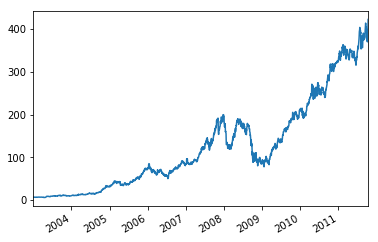

In [188]:
close_px['AAPL'].plot()

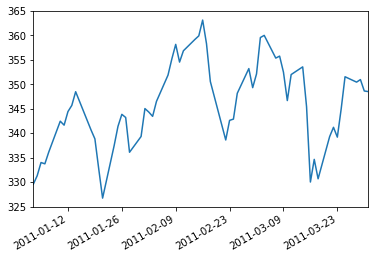

In [189]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

In [190]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
appl_q

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


2003-03-31      7.07
2003-06-30      9.53
2003-09-30     10.36
2003-12-31     10.69
2004-03-31     13.52
2004-06-30     16.27
2004-09-30     19.38
2004-12-31     32.20
2005-03-31     41.67
2005-06-30     36.81
2005-09-30     53.61
2005-12-31     71.89
2006-03-31     62.72
2006-06-30     57.27
2006-09-30     76.98
2006-12-31     84.84
2007-03-31     92.91
2007-06-30    122.04
2007-09-30    153.47
2007-12-31    198.08
2008-03-31    143.50
2008-06-30    167.44
2008-09-30    113.66
2008-12-31     85.35
2009-03-31    105.12
2009-06-30    142.43
2009-09-30    185.35
2009-12-31    210.73
2010-03-31    235.00
2010-06-30    251.53
2010-09-30    283.75
2010-12-31    322.56
2011-03-31    348.51
2011-06-30    335.67
2011-09-30    381.32
2011-12-31    422.00
Freq: Q-DEC, Name: AAPL, dtype: float64

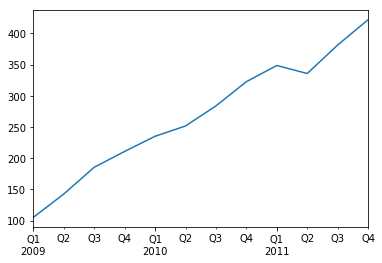

In [191]:
appl_q.ix['2009':].plot()

# 10.8

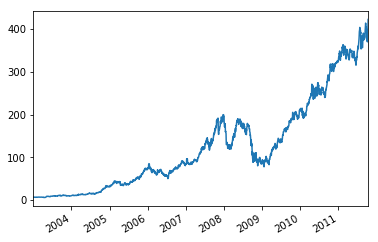

In [192]:
close_px.AAPL.plot()

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=250).mean()
  if __name__ == '__main__':


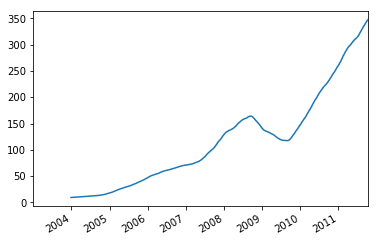

In [193]:
pd.rolling_mean(close_px.AAPL, 250).plot()

In [194]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=10,center=False,window=250).std()
  if __name__ == '__main__':


In [195]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Name: AAPL, dtype: float64

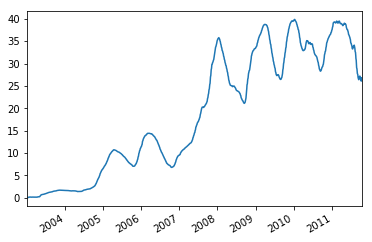

In [196]:
appl_std250.plot()

In [197]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=60).mean()
  if __name__ == '__main__':


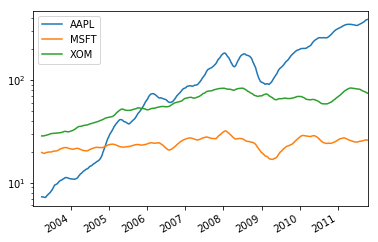

In [198]:
pd.rolling_mean(close_px, 60).plot(logy=True)

# 10.8.1

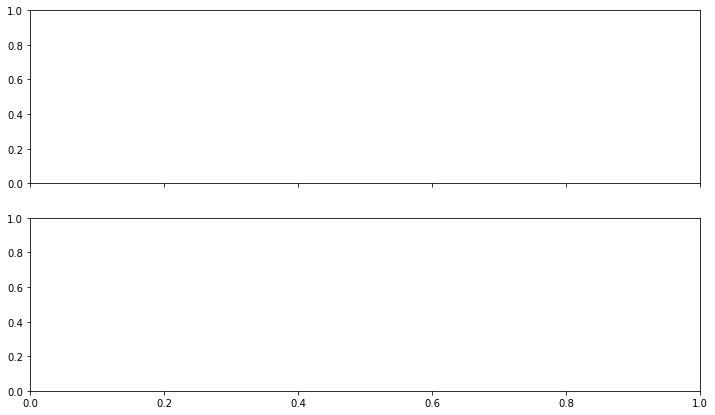

In [199]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12,7))

In [200]:
aapl_px = close_px.AAPL['2005':'2009']

In [201]:
ma60 =pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=50,center=False,window=60).mean()
  if __name__ == '__main__':
/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,span=60,ignore_na=False,min_periods=0).mean()
  from ipykernel import kernelapp as app


In [202]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111316a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x111971748>], dtype=object)

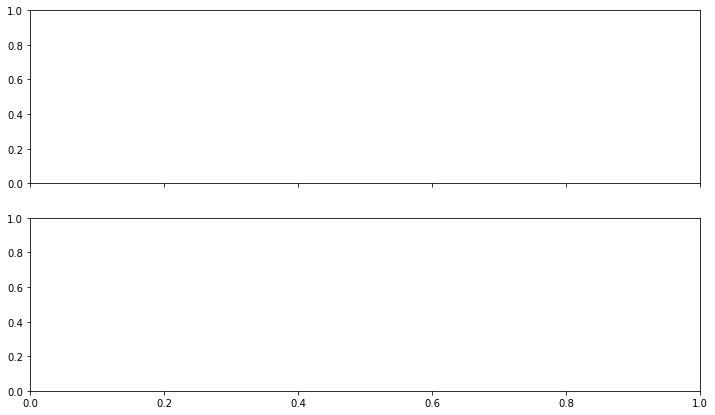

In [203]:
fig

In [204]:
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [205]:
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])

In [206]:
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])

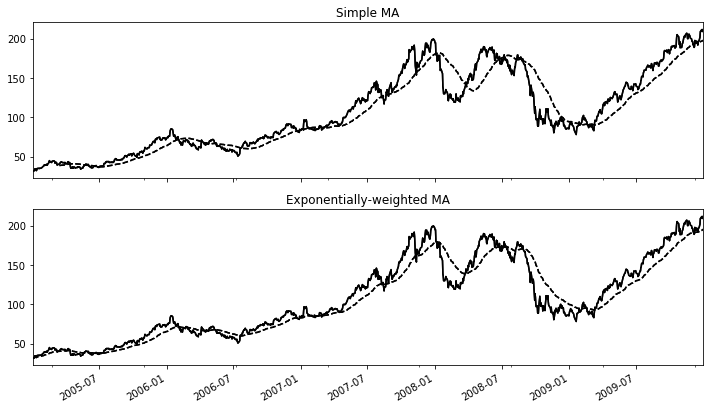

In [207]:
fig

In [208]:
spx_px = close_px_all['SPX']

In [209]:
spx_rets = spx_px / spx_px.shift(1) -1 

In [210]:
returns = close_px.pct_change()

In [212]:
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=100,window=125).corr(other=<Series>)
  if __name__ == '__main__':


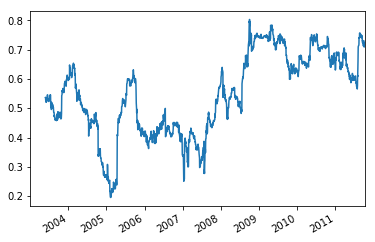

In [213]:
corr.plot()

In [214]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)

/Users/hiroki/.pyenv/versions/anaconda3-4.0.0/envs/py3_personal/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=125).corr(other=<Series>)
  if __name__ == '__main__':


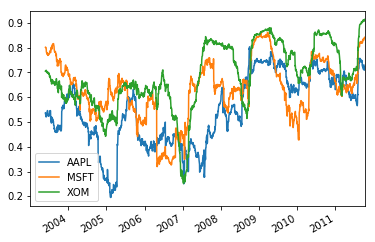

In [215]:
corr.plot()